<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ2 *Boosting*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de *Boosting*.

## 1. Instalar los packages necesarios 

In [1]:
if(!require(cart)){
    install.packages('cart',repos='http://cran.es.r-project.org')
    require(cart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: cart

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cart’”
Warning message:
“package ‘cart’ is not available (for R version 3.5.1)”
Loading required package: cart

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cart’”
Loading required package: caret

Warning message:
“package ‘caret’ was built under R version 3.5.2”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.5.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Loading required package: C50

Loading required package: car

Warning message:
“package ‘car’ was built under R version 3.5.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 3.5.2”
Loading required package: plyr

Warning messag

## 2. Carga de los datos

In [2]:
wdbc=read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
  sep=",", header=FALSE)

dim(wdbc)

[1] 699  11

### Preparación de los datos

En concreto:
- Corregir valores '?'
- Eliminar valores ausentes

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))
wdbc=wdbc[complete.cases(wdbc),]
dataset <- wdbc[,(2:11)]

## 3. Creación del modelo

### Parámetros de creación del modelo

In [4]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)

# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"
grid <- expand.grid( .winnow = c(FALSE), .trials=c(1,5,10,15,25,50,75,100), .model="tree" )

### Creamos un modelo de árbol con el método de *boosting*

In [5]:
model.boost <- train(as.factor(V11)~., tuneGrid=grid,data=dataset, method="C5.0",metric=metric, trControl=control)

### Matriz de confusión

In [6]:
confusionMatrix(model.boost)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction  2  4
         2 63  1
         4  2 34
                            
 Accuracy (average) : 0.9693


###  Mostramos todas sus características

C5.0 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 615, 615, 614, 615, 614, ... 
Resampling results across tuning parameters:

  trials  Accuracy   Kappa    
    1     0.9497365  0.8903500
    5     0.9585099  0.9089344
   10     0.9624459  0.9177447
   15     0.9624532  0.9178628
   25     0.9658490  0.9253875
   50     0.9663463  0.9265194
   75     0.9673267  0.9287255
  100     0.9692733  0.9331055

Tuning parameter 'model' was held constant at a value of tree
Tuning
 parameter 'winnow' was held constant at a value of FALSE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 100, model = tree and
 winnow = FALSE.


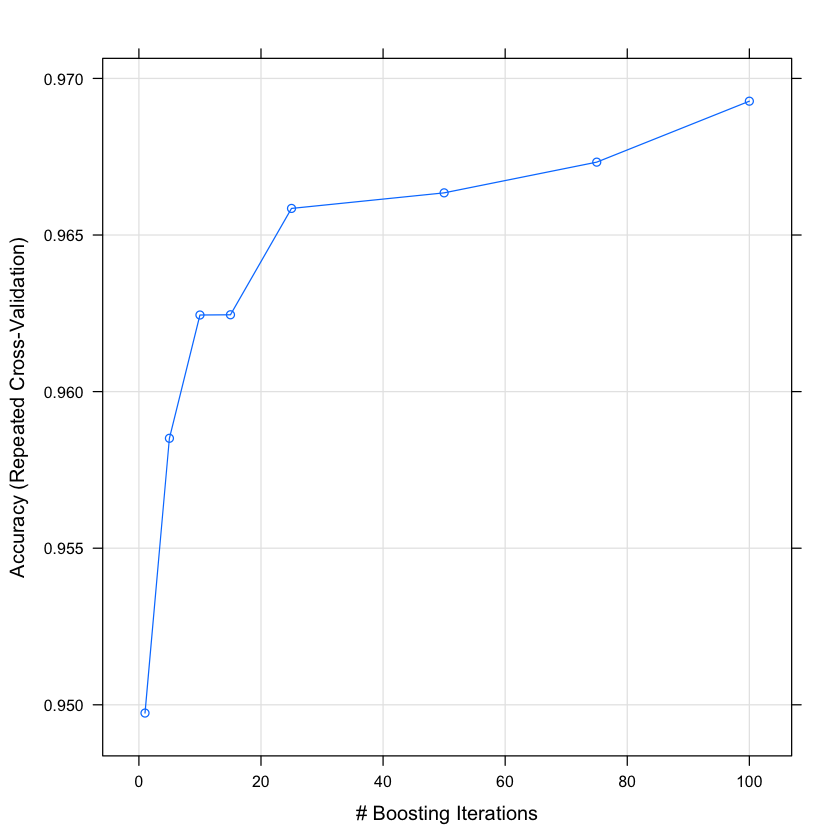

In [7]:
print(model.boost)
plot(model.boost)